### Selection Assessment  - Engineering Analytics - Dialog Axiata PLC

#### Name: <  Devin Hansa de Silva >
#### E Mail: < devinhansa@gmail.com >

### Part (a)
#### Load and assess "cx_churn_data.csv" dataset.

Explain how data was loaded...

1. **import pandas as pd**: This line imports pandas library assigns it the alias pd. pandas is a library in python used for data manipulation and analysis.

2. **df = pd.read_csv("cx_churn_data.csv")**: This line reads CSV file named "cx_churn_data.csv" and creates data frame called df to hold data. read_csv is a pandas method used to read data from a CSV file and convert it into a data frame.

3. **print(df.head())**: This line prints first five rows of the data frame df. It was used to take a quick preview on the content of the dataset.

In [1]:
# Insert code for question (a)
import pandas as pd

# Load the dataset
df = pd.read_csv("cx_churn_data.csv")

# Display the first five rows of the DataFrame
df.head()


,cx_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_connections,internet_connection_type,device_insurance,call_center_support,dtv,dtv_viu,account_type,e_bill,payment_method,monthly_bill,total_bill,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,HBB,No,No,No,No,prepaid,Yes,app,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,HBB,Yes,No,No,No,postpaid,No,cash,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,HBB,No,No,No,No,prepaid,Yes,cash,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,HBB,Yes,Yes,No,No,postpaid,No,bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,MBB,No,No,No,No,prepaid,Yes,app,70.70,151.65,Yes


In [2]:
df.shape

(7043, 19)

**df. shape** returns a tuple representing the dimensions of the DataFrame. 7043 indicates number of rows and 19 indicates number of columns.

In [4]:
#getting summary of numerical values
df.describe()

,tenure,monthly_bill
count,7043.000000,7042.000000
mean,32.371149,64.758634
std,24.559481,30.091089
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [5]:
df.dtypes

cx_id                        object
gender                       object
senior_citizen               object
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_connections         object
internet_connection_type     object
device_insurance             object
call_center_support          object
dtv                          object
dtv_viu                      object
account_type                 object
e_bill                       object
payment_method               object
monthly_bill                float64
total_bill                   object
churn                        object
dtype: object

In [7]:
df.total_bill.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Explain the challenges encountered and describe dataset.

1. tenure and monthly_bil coloumns contain numerical values while cx_id, gender,senior_citizen, dependents, phone_service, internet_connection_type, device_insurance, call_center_support, dtv, dtv_viu, account_type, e_bill, payment_method, partner, multiple_connections,  total_bill churn columns contain strings(categorical columns). churn is identified as ground truth value.

2. total_bill is given as an object, it should be corrected.

### Part (b)
#### Data cleansing

In [8]:
# Insert code for part (b)

# Convert the 'total_bill' column to numeric values
df.total_bill = pd.to_numeric(df.total_bill, errors='coerce')

df.dtypes

cx_id                        object
gender                       object
senior_citizen               object
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_connections         object
internet_connection_type     object
device_insurance             object
call_center_support          object
dtv                          object
dtv_viu                      object
account_type                 object
e_bill                       object
payment_method               object
monthly_bill                float64
total_bill                  float64
churn                        object
dtype: object

In [9]:
# Check the number of missing values in each column of the DataFrame
df.isnull().sum()


cx_id                        0
gender                       0
senior_citizen               0
partner                      0
dependents                   1
tenure                       0
phone_service                2
multiple_connections         0
internet_connection_type     3
device_insurance             2
call_center_support          4
dtv                          3
dtv_viu                      2
account_type                 1
e_bill                       1
payment_method               5
monthly_bill                 1
total_bill                  11
churn                        0
dtype: int64

In [11]:
# Drop the 'cx_id' column from the DataFrame
df.drop(columns=['cx_id'], axis=1, inplace=True)


In [12]:
# Select rows with missing values and print them
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)


      gender senior_citizen partner dependents  tenure phone_service  \
488   Female              0     Yes        Yes       0            No   
534   Female              0      No        NaN       1           NaN   
540   Female              0     Yes        Yes      72           Yes   
544     Male              0      No         No      13            No   
546     Male              0     Yes        Yes      39           Yes   
548     Male              1     Yes         No      50           Yes   
564     Male              0      No         No       7           Yes   
569   Female              0      No         No      11            No   
572   Female              0      No         No      11           Yes   
580   Female              0     Yes        Yes      12           Yes   
611   Female              0     Yes        Yes       9           NaN   
614     Male              0      No         No      50           Yes   
728   Female              1      No         No      30          

Describe steps taken to cleanse the dataset

1. Identified that there are missing values in the dataset and decided to fill the missing values. Since there 7043 records we can ignore the records with missing values but according to my opinion it is better to fill those to avoid even slight effect to churn prediction.

2. Removed 'cx_id' column because there is connection for churn prediction.

### Part (c)
#### Fill in missing values using suitable methods. (If required)

In [13]:
# Insert code for part (c)

# For categorical variables
categorical_vars = ['dependents', 'phone_service', 'internet_connection_type', 'device_insurance',
                    'call_center_support', 'dtv', 'dtv_viu', 'account_type', 'e_bill', 'payment_method']

# Fill missing values in categorical variables with the mode
for var in categorical_vars:
    df[var].fillna(df[var].mode()[0], inplace=True)

# For numeric variables
numeric_vars = ['monthly_bill', 'total_bill']

# Fill missing values in numeric variables with the mean
for var in numeric_vars:
    df[var].fillna(df[var].mean(), inplace=True)

In [14]:
# Calculate the sum of missing values in each column after fill in missing values
missing_values_sum = df.isnull().sum()
print(missing_values_sum)


gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_connections        0
internet_connection_type    0
device_insurance            0
call_center_support         0
dtv                         0
dtv_viu                     0
account_type                0
e_bill                      0
payment_method              0
monthly_bill                0
total_bill                  0
churn                       0
dtype: int64


Describe methods used and justify.

1. **For categorical variables**: filling missing values with the mode ensures that the most common value in each category is used which is likely representative of the majority of cases. This method helps preserve the distribution of the categorical data.

2. **For numeric variables**: filling missing values with the mean ensures that the central tendency of the data is preserved. Using the mean can help minimize the impact of outliers on the imputation process and provides a reasonable estimate for the missing values

### Part (d)
#### Account for class imbalance with suitable methods.

In [15]:
# Insert code for part (d)

# Check class distribution
class_distribution = df['churn'].value_counts()
print("Class distribution:")
print(class_distribution)

Class distribution:
churn
No     5174
Yes    1869
Name: count, dtype: int64


In [16]:
# Importing NumPy library as np for array operations
import numpy as np

# Converting 'churn' column to binary values
# If 'churn' is 'Yes', set value to 1, otherwise set it to 0
df['churn'] = np.where(df.churn == 'Yes', 1, 0)


In [17]:
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_connections,internet_connection_type,device_insurance,call_center_support,dtv,dtv_viu,account_type,e_bill,payment_method,monthly_bill,total_bill,churn
0,Female,0,Yes,No,1,No,No phone service,HBB,No,No,No,No,prepaid,Yes,app,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,HBB,Yes,No,No,No,postpaid,No,cash,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,HBB,No,No,No,No,prepaid,Yes,cash,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,HBB,Yes,Yes,No,No,postpaid,No,bank transfer,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,MBB,No,No,No,No,prepaid,Yes,app,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,HBB,Yes,Yes,Yes,Yes,postpaid,Yes,cash,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,MBB,Yes,No,Yes,Yes,postpaid,Yes,credit card,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,HBB,No,No,No,No,prepaid,Yes,app,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,MBB,No,No,No,No,prepaid,Yes,cash,74.40,306.60,1


In [18]:
# Creating dummy variables for categorical columns
# This converts categorical variables into numerical variables using one-hot encoding
df_dummy = pd.get_dummies(df)
df_dummy

,tenure,monthly_bill,total_bill,churn,gender_Female,gender_Male,senior_citizen_0,senior_citizen_1,senior_citizen_n,senior_citizen_no,...,dtv_viu_Yes,account_type_enterprise,account_type_postpaid,account_type_prepaid,e_bill_No,e_bill_Yes,payment_method_app,payment_method_bank transfer,payment_method_cash,payment_method_credit card
0,1,29.85,29.85,0,True,False,True,False,False,False,...,False,False,False,True,False,True,True,False,False,False
1,34,56.95,1889.50,0,False,True,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,2,53.85,108.15,1,False,True,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
3,45,42.30,1840.75,0,False,True,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
4,2,70.70,151.65,1,True,False,True,False,False,False,...,False,False,False,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,False,True,True,False,False,False,...,True,False,True,False,False,True,False,False,True,False
7039,72,103.20,7362.90,0,True,False,True,False,False,False,...,True,False,True,False,False,True,False,False,False,True
7040,11,29.60,346.45,0,True,False,True,False,False,False,...,False,False,False,True,False,True,True,False,False,False
7041,4,74.40,306.60,1,False,True,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False


In [19]:
df_dummy.dtypes

tenure                                     int64
monthly_bill                             float64
total_bill                               float64
churn                                      int64
gender_Female                               bool
gender_Male                                 bool
senior_citizen_0                            bool
senior_citizen_1                            bool
senior_citizen_n                            bool
senior_citizen_no                           bool
senior_citizen_y                            bool
senior_citizen_yes                          bool
partner_No                                  bool
partner_Yes                                 bool
dependents_No                               bool
dependents_Yes                              bool
phone_service_No                            bool
phone_service_Yes                           bool
multiple_connections_No                     bool
multiple_connections_No phone service       bool
multiple_connections

In [20]:
# Saving the DataFrame with dummy variables to a new CSV file
df_dummy.to_csv('cx_new_churn.csv')


In [27]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [22]:
# Reading the new CSV file into a DataFrame
df_model = pd.read_csv('cx_new_churn.csv')

In [23]:
df_model

,Unnamed: 0,tenure,monthly_bill,total_bill,churn,gender_Female,gender_Male,senior_citizen_0,senior_citizen_1,senior_citizen_n,...,dtv_viu_Yes,account_type_enterprise,account_type_postpaid,account_type_prepaid,e_bill_No,e_bill_Yes,payment_method_app,payment_method_bank transfer,payment_method_cash,payment_method_credit card
0,0,1,29.85,29.85,0,True,False,True,False,False,...,False,False,False,True,False,True,True,False,False,False
1,1,34,56.95,1889.50,0,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,2,2,53.85,108.15,1,False,True,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,3,45,42.30,1840.75,0,False,True,True,False,False,...,False,False,True,False,True,False,False,True,False,False
4,4,2,70.70,151.65,1,True,False,True,False,False,...,False,False,False,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,24,84.80,1990.50,0,False,True,True,False,False,...,True,False,True,False,False,True,False,False,True,False
7039,7039,72,103.20,7362.90,0,True,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
7040,7040,11,29.60,346.45,0,True,False,True,False,False,...,False,False,False,True,False,True,True,False,False,False
7041,7041,4,74.40,306.60,1,False,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False


In [24]:
# Dropping the 'Unnamed: 0' column from the DataFrame
df_model = df_model.drop("Unnamed: 0", axis=1)


In [25]:
# Creating X_values by dropping the 'churn' column
X_values = df_model.drop("churn", axis=1)

# Creating y_value containing only the 'churn' column
y_value = df_model["churn"]
y_value


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

Text(0.5, 1.0, 'Churn Column')

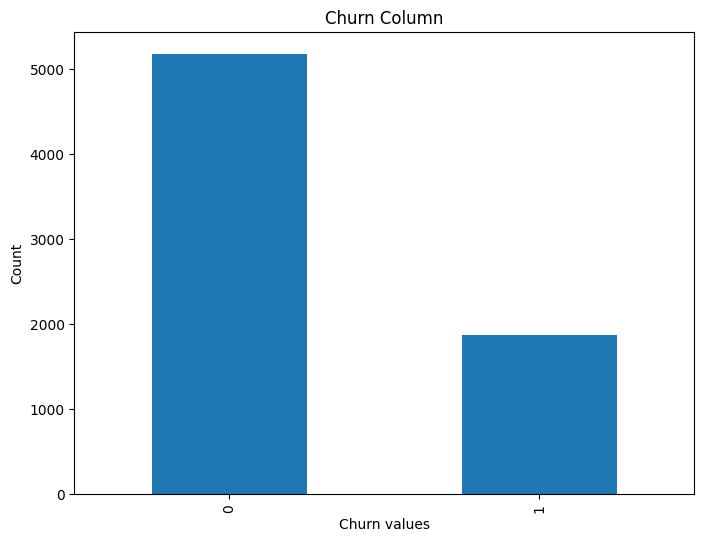

In [28]:
# Plotting the distribution of churn values
y_value.value_counts().plot(kind='bar', figsize=(8,6))
plt.xlabel("Churn values")
plt.ylabel("Count")
plt.title("Churn Column")

In [29]:
# Calculate the percentage distribution of churn values
# by multiplying the counts of each churn value by 100 and dividing by the total number of entries
100*y_value.value_counts()/len(y_value)

churn
0    73.463013
1    26.536987
Name: count, dtype: float64

In [30]:
# Perform Synthetic Minority Over-sampling Technique (SMOTE) combined with Edited Nearest Neighbors (ENN) resampling
# to balance the class distribution by oversampling the minority class (churn = 1) and undersampling the majority class (churn = 0)
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X_values, y_value)

In [31]:
# Calculate the percentage distribution of churn values after resampling
100*y_resampled.value_counts()/len(y_resampled)

churn
1    54.250173
0    45.749827
Name: count, dtype: float64

Describe methods used and justify.

1. SMOTEENN addresses class imbalance by oversampling the minority class (churned customers). t does this by creating synthetic data points for the minority class.

2. One-hot encoding used as a technique for transforming categorical variables into numerical features.It creates a new binary variable (0 or 1) for each unique category within the original categorical variable.



### Part (e)
#### Train ML model to predict churn

In [32]:
# Insert code for part (e)

# Split the dataset into training and testing sets
# X_values: features
# y_value: target variable (churn)
# test_size=0.2: 20% of the data will be used for testing, and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X_values, y_value, test_size=0.2)


In [33]:
# Initialize a Random Forest Classifier model
random_forest_model = RandomForestClassifier()

# Train the Random Forest model on the training data
random_forest_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_predict_value_random_forest = random_forest_model.predict(X_test)

# Evaluate the accuracy of the model on the test data
accuracy_random_forest = random_forest_model.score(X_test, y_test)


In [34]:
# Print the classification report for the Random Forest model
print(classification_report(y_test, y_predict_value_random_forest))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1039
           1       0.67      0.48      0.56       370

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [35]:
# Split the resampled data into training and testing sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled.ravel(), test_size=0.2)

In [36]:
# Create and train the Random Forest model on resampled data
model_rf_resampled = RandomForestClassifier()
model_rf_resampled.fit(Xr_train, yr_train)

# Calculate the accuracy score of the Random Forest model on the test set
accuracy_rf_resampled = model_rf_resampled.score(Xr_test, yr_test)
accuracy_rf_resampled

0.9602763385146805

In [37]:
# Generate predictions using the resampled random forest model
yr_rf_predicted_values = model_rf_resampled.predict(Xr_test)

print(classification_report(yr_test, yr_rf_predicted_values))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       516
           1       0.96      0.97      0.96       642

    accuracy                           0.96      1158
   macro avg       0.96      0.96      0.96      1158
weighted avg       0.96      0.96      0.96      1158



In [38]:
# Calculate the confusion matrix for the resampled random forest model
confusion_matrix(yr_test, yr_rf_predicted_values)

array([[490,  26],
       [ 20, 622]])

Describe what happened and elaborate on model performance

1. Precision is 0.96, indicating that 96% of the instances predicted as non-churn were actually non-churn. For class 1 (churn), the precision is also 0.96, indicating that 96% of the instances predicted as churn were actually churn.

2. For class 0, the recall is 0.95, indicating that 95% of the actual non-churn instances were correctly predicted as non-churn. For class 1, the recall is 0.97, indicating that 97% of the actual churn instances were correctly predicted as churn.

3. For both classes, the F1-score is 0.96, indicating high accuracy in predicting both churn and non-churn instances.

4. The overall accuracy is 0.96, indicating that 96% of the predictions made by the model on the test dataset were correct.

### Answer (f)

Train an ANN model

In [45]:
# Insert code for part (f)

# Convert data types
Xr_train = Xr_train.astype(np.float32)
yr_train = yr_train.astype(np.float32)
Xr_test = Xr_test.astype(np.float32)
yr_test = yr_test.astype(np.float32)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(24, input_shape=(Xr_train.shape[1],), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Xr_train, yr_train, epochs=40)


# Evaluate the model
loss, accuracy = model.evaluate(Xr_test, yr_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Generate predictions
y_pred_prob = model.predict(Xr_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate classification report
from sklearn.metrics import classification_report
print(classification_report(yr_test, y_pred))

Epoch 1/40
145/145 [==============================] - 2s 5ms/step - loss: 11.3823 - accuracy: 0.7110
Epoch 2/40
145/145 [==============================] - 1s 5ms/step - loss: 0.4521 - accuracy: 0.8395
Epoch 3/40
145/145 [==============================] - 1s 4ms/step - loss: 0.4323 - accuracy: 0.8646
Epoch 4/40
145/145 [==============================] - 1s 4ms/step - loss: 0.4146 - accuracy: 0.8708
Epoch 5/40
145/145 [==============================] - 1s 4ms/step - loss: 0.3892 - accuracy: 0.8771
Epoch 6/40
145/145 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.8881
Epoch 7/40
145/145 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8877
Epoch 8/40
145/145 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.8985
Epoch 9/40
145/145 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.8989
Epoch 10/40
145/145 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.899

1. A lower test loss(0.171) indicates better performance, as it means the model's predictions are closer to the actual values.

2. ANN model achieved an accuracy of approximately 93.18%, indicating that it correctly classified about 93.18% of the instances in the test dataset.

3. Precision indicates about 92% of the instances predicted as "0" were actually "0". For the class labeled as "1", the precision is 94%, indicating that about 94% of the instances predicted as "1" were actually "1"(churn).

4. Recall for the class labeled as "0", the recall is approximately 92%, indicating that about 92% of the actual "0" instances were correctly predicted as "0". For the class labeled as "1", the recall is approximately 94%, indicating that about 94% of the actual "1" instances were correctly predicted as "1".



Describe what happened and elaborate on model performance.
Compare (e) model performance with (f).

Both ANN and Random Forest models achieved good performance in classifying churned and not churned customers.

**Random Forest**
1. Achieved a perfect F1-score of 0.96 for both churned and not churned customers, indicating a better balance between precision and recall.

2. Easier to understand which factors contribute most to churn due to its inherent feature importance calculation.

3. Generally faster to train compared to ANNs.

**ANN**
1. Achieved an F1-score of 0.92 for both churned and not churned customers, indicating slightly less balanced performance compared to the Random Forest in this scenario.

2. The inner workings of ANNs are complex and harder to decipher, making it difficult to understand why customers churn(called as black box).

3. Computationally expensive to train.

